In [87]:
import pandas as pn
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn import tree
import matplotlib.pyplot as plot

### Применение реашающего дерева

In [59]:
dataset = pn.read_csv("german.data-numeric.txt", header=None, delim_whitespace=True)
X, y = dataset.iloc[:,:-1], dataset.iloc[:, -1]
names = range(0, 25)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


In [82]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [83]:
# визуализация решающего дерева
dot_data = export_graphviz(model, out_file="small_tree.out", 
                         feature_names=names,  
                         class_names=['Good', 'Bad'],  
                         filled=True, rounded=True,  
                         special_characters=False) 

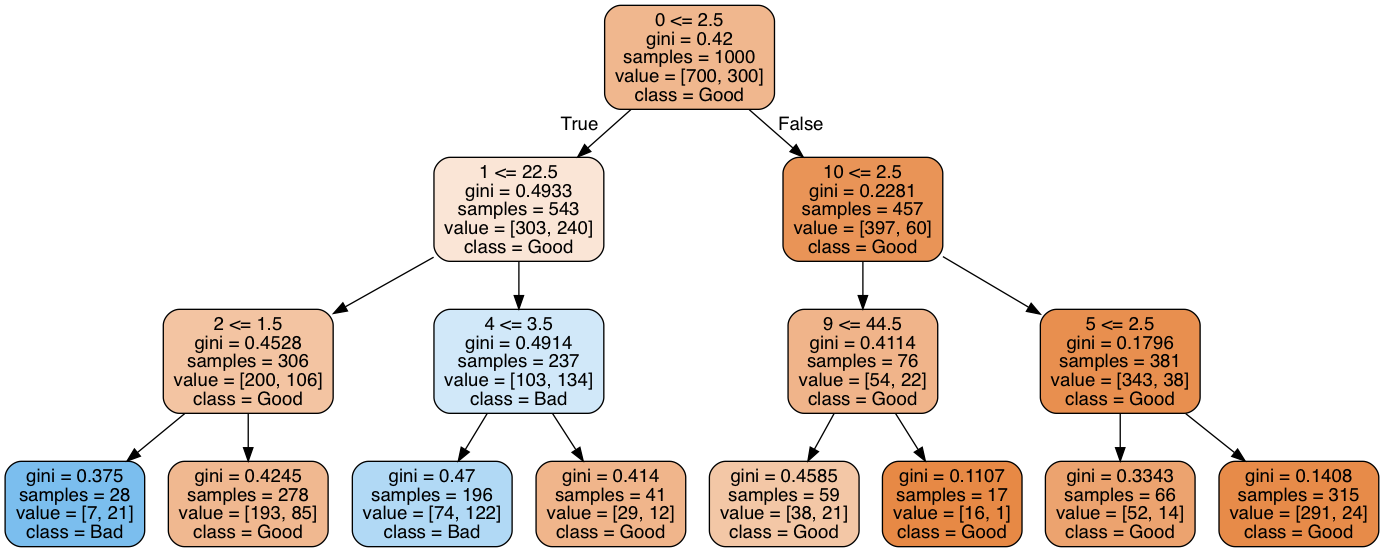

In [85]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png()) 

В german.data-numeric нет описания признаков, поэтому сложно интерпретировать разбиения. Однако можно рассмотреть описания признаков german.data
Рассмотрим, например, самые левые две: Клиенты с небольшим счетом в банке берут кредит менее чем на 2 года. Далее значительную роль играет их кредитная история: клиенты, отдававшие кредиты всегда вовремя и этот скорее всего тоже отдадут, а другие уже менее вероятно отдадут.
Во многих ветках выбранная глибина недостаточна как видно.

### Зависимость качества на cross-validation от глубины решающего дерева

In [100]:
from sklearn.model_selection import cross_val_score

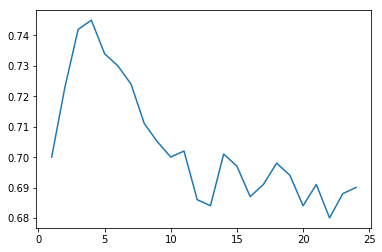

In [122]:
# качество на кросс-валидации

def compute_score_cv(depth, X, y):
    model  = DecisionTreeClassifier(max_depth=depth)
    return cross_val_score(model, X, y).mean()

max_depth = 25
depths = range(1, max_depth)
scores = [compute_score_cv(d, X, y) for d in depths]

plot.figure()
plot.plot(depths, scores)
plot.show()

Видно, что результат далеко не идеальный. Судя по выборке, отвечая всегда положительно можно добиться результата около 0.7(accuracy)

### Качество на обучающей выборке в зависимости от глубины дерева. Переобучение.

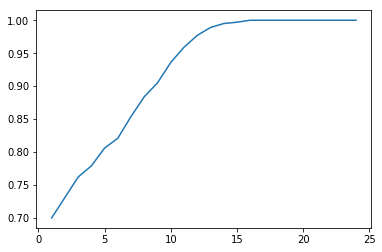

In [121]:
# качество на обучаеющей выборке

def compute_score(depth, X, y):
    model  = DecisionTreeClassifier(max_depth=depth)
    model.fit(X, y)
    predicted = model.predict(X)
    guess = 0.
    for i in range(0, len(y)):
        if predicted[i] == y[i]:
            guess += 1  
    return float(guess) / len(y)

max_depth = 25
depths = range(1, max_depth)
scores = [compute_score(d, X, y) for d in depths]

plot.figure()
plot.plot(depths, scores)
plot.show()

На графике превосходно видно то, что при увеличении глубины дерева, происходит переобучение. Наверняка в листья попадает всего по одному объекту из обучающей выборке.